<h1>WGU D208 TASK 1 REV 10 - MATTINSON</h1>

<h2>Part III(a): Data Preparation</h2>
C. Summarize data preparation for multiple regression by doing the following:

In [1]:
# import and configure packages
from imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

w:\code\wgu\py39\Scripts\python.exe
python version: 3.9.7
pandas version: 1.4.2
numpy version: 1.22.3
scipy version: 1.8.0
sklearn version: 1.0.2
matplotlib version: 3.5.2
seaborn version: 0.11.2


In [2]:
from helpers import *

get_course_filename_str version: 1.5
save_course_table_csv version: 1.4
describe_dataframe_type version: 1.1
create_scatter_plot_fig version: 1.1
create_barplot_num_vs_cat_fig version: 1.9
create_distribution_plot_from_feature_fig version: 1.9
get_unique_values_list version: 1.2
create_correlation_matrix version: 1.2
get_redundant_pairs version: 1.0
get_top_n_correlations version: 1.1
create_simple_histogram_numerical_feature_fig version: 1.10
create_stacked_barplot_cat_or_bool_feature_fig version: 1.7
create_stacked_histogram_num_feature_fig version: 1.6


In [3]:
#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']
target='MonthlyCharge'

In [5]:
# install statsmodels
!pip install statsmodels

  Using cached statsmodels-0.13.2-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

<div style="font-family:Impact;">Import Raw Data.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Import churn_clean.csv.</span></div>

In [7]:
# load data from .csv
df_raw = pd.read_csv('data/churn_clean.csv')

<p style="page-break-after:always;"></p><h4><div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 1.<span style="font-weight: normal;">RAW</span></div></h4>Initial state of data before any manipulation.

In [8]:
save_course_table_csv(data=df_raw, title='RAW', title_only=True)

,0,1,2,3
CaseOrder,1,2,3,4
Customer_id,K409198,S120509,K191035,D90850
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311
UID,e885b299883d4f9fb18e39c75155d990,f2de8bef964785f41a2959829830fb8a,f1784cfa9f6d92ae816197eb175d3c71,dc8a365077241bb5cd5ccd305136b05e
City,Point Baker,West Branch,Yamhill,Del Mar
State,AK,MI,OR,CA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego
Zip,99927,48661,97148,92014
Lat,56.251,44.32893,45.35589,32.96687
Lng,-133.37571,-84.2408,-123.24657,-117.24798


shape: (10000, 50)
Table saved to: TABLES/RAW.CSV


In [9]:
df_clean = df_raw.copy() # create a clean dataframe

<div style="font-family:Impact;">Drop Unwanted Data.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Drop unwanted data.</span></div>

In [10]:
# remove unwanted data
cols_to_drop = ['City','County','Zip','Job','TimeZone', 'State', 'Churn', 
            'Lat', 'Lng', 'UID', 'Customer_id','Interaction', 'CaseOrder',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
df_clean = df_clean.drop(columns=cols_to_drop)

<div style="font-family:Impact;">Convert Yes/No to Bool.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Convert Yes/No columns to True/False and then retype to Boolean.</span></div>

In [11]:
# describe data by datatype
describe_dataframe_type(df_clean)


1. Population is numerical (CONTINUOUS) - type: int64.
  Unique: [0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 32801, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 32825, 59, 61, 62, 63, 64, 60, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 32901, 138, 137, 140, 141, 142, 143, 139, 145, 146, 144, 148, 149, 147, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 32929, 163, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 32944, 177, 178, 179, 180, 176, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 

In [12]:
# explore missing data
missing = df_clean[df_clean.columns[df_clean.isna().any()]].columns
df_missing = df_clean[missing]
print(df_missing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Empty DataFrameNone


In [13]:
# fill null values for missing numerical data
df_clean['Children'].fillna(0, inplace=True)
df_clean['Age'].fillna(df_clean['Age'].mean(), inplace=True)
df_clean['Income'].fillna(df_clean['Income'].mean(), inplace=True)
df_clean['Bandwidth_GB_Year'].fillna(df_clean['Bandwidth_GB_Year'].mean(), inplace=True)
df_clean['Tenure'].fillna(df_clean['Tenure'].mean(), inplace=True)

In [14]:
# fill null values for missing categorical data
df_clean['Techie'].fillna('No', inplace=True)
df_clean['Phone'].fillna('No', inplace=True)
df_clean['TechSupport'].fillna('No', inplace=True)

In [15]:
# explore missing data
missing = df_clean[df_clean.columns[df_clean.isna().any()]].columns
df_missing = df_clean[missing]
print(df_missing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Empty DataFrameNone


In [16]:
# look for duplicate data - looking for zero rows
df_clean[df_clean.duplicated()]

,Population,Area,Children,Age,Income,Marital,Gender,Outage_sec_perweek,Email,Contacts,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year


In [17]:
# check if any cols are duplicated - Looking for False
df_clean.columns.duplicated().any()

False

In [18]:
# check if any rows are duplicated - looing for False
df_clean.duplicated().any()

False

<h3>C5. Provide a copy of the cleaned dataset.

<p style="page-break-after:always;"></p><h4><div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 2.<span style="font-weight: normal;">CLEAN</span></div></h4>Cleaned data.

In [19]:
save_course_table_csv(data=df_clean, title='CLEAN', title_only=True)

,0,1,2,3
Population,38,10446,3735,13863
Area,Urban,Urban,Urban,Suburban
Children,0,1,4,1
Age,68,27,50,48
Income,28561.99,21704.77,9609.57,18925.23
Marital,Widowed,Married,Widowed,Married
Gender,Male,Female,Female,Male
Outage_sec_perweek,7.978323,11.69908,10.7528,14.91354
Email,10,12,9,15
Contacts,0,0,0,2


shape: (10000, 29)
Table saved to: TABLES/CLEAN.CSV


<h2>Part III(b): Data Exploration</h2>
C. Explore data for multiple regression by doing the following:

<h3>C6. Explore Categorical Data.

In [20]:
# print out input variables
for c in df_clean.loc[:, df_clean.columns != target]:
    if df_clean.dtypes[c] == "object":
        print('\n{} is categorical: {}.'.format(c,df_clean[c].unique()))
    else:
        print('\n{} is numerical:'.format(c ))
        print('\trange = {} - {}'.format(df_clean[c].min(),df_clean[c].max()))
        print('\tmean = {:.2f} +/- {:.2f}'.format(df_clean[c].mean(), df_clean[c].std()))


Population is numerical:
	range = 0 - 111850
	mean = 9756.56 +/- 14432.70

Area is categorical: ['Urban' 'Suburban' 'Rural'].

Children is numerical:
	range = 0 - 10
	mean = 2.09 +/- 2.15

Age is numerical:
	range = 18 - 89
	mean = 53.08 +/- 20.70

Income is numerical:
	range = 348.67 - 258900.7
	mean = 39806.93 +/- 28199.92

Marital is categorical: ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

Gender is categorical: ['Male' 'Female' 'Nonbinary'].

Outage_sec_perweek is numerical:
	range = 0.09974694 - 21.20723
	mean = 10.00 +/- 2.98

Email is numerical:
	range = 1 - 23
	mean = 12.02 +/- 3.03

Contacts is numerical:
	range = 0 - 7
	mean = 0.99 +/- 0.99

Yearly_equip_failure is numerical:
	range = 0 - 6
	mean = 0.40 +/- 0.64

Techie is categorical: ['No' 'Yes'].

Contract is categorical: ['One year' 'Month-to-month' 'Two Year'].

Port_modem is categorical: ['Yes' 'No'].

Tablet is categorical: ['Yes' 'No'].

InternetService is categorical: ['Fiber Optic' 'DSL' 'None'].

In [21]:
# define categorical data
categorical_features = df_clean.select_dtypes(include="object").columns
print(categorical_features)

Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [22]:
# define bool features
bool_features = df_clean.select_dtypes(include="bool").columns
print(bool_features)

Index([], dtype='object')


In [23]:
# convert array to list then append lists
cat_or_bool_features = categorical_features.tolist() + bool_features.tolist()
print(cat_or_bool_features)

['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


In [24]:
# describe cat and bool features by datatype
describe_dataframe_type(df_clean[cat_or_bool_features])


1. Area is categorical (CATEGORICAL): ['Urban' 'Suburban' 'Rural'].

2. Marital is categorical (CATEGORICAL): ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

3. Gender is categorical (CATEGORICAL): ['Male' 'Female' 'Nonbinary'].

4. Techie is categorical (CATEGORICAL): ['No' 'Yes'].

5. Contract is categorical (CATEGORICAL): ['One year' 'Month-to-month' 'Two Year'].

6. Port_modem is categorical (CATEGORICAL): ['Yes' 'No'].

7. Tablet is categorical (CATEGORICAL): ['Yes' 'No'].

8. InternetService is categorical (CATEGORICAL): ['Fiber Optic' 'DSL' 'None'].

9. Phone is categorical (CATEGORICAL): ['Yes' 'No'].

10. Multiple is categorical (CATEGORICAL): ['No' 'Yes'].

11. OnlineSecurity is categorical (CATEGORICAL): ['Yes' 'No'].

12. OnlineBackup is categorical (CATEGORICAL): ['Yes' 'No'].

13. DeviceProtection is categorical (CATEGORICAL): ['No' 'Yes'].

14. TechSupport is categorical (CATEGORICAL): ['No' 'Yes'].

15. StreamingTV is categorical (CATEGORICAL): ['No' 'Ye

<h3>C9. Explore Categorical Data.

Figure saved to: FIGURES/__FIG_3B_C9_1_CONTRACT_DISTRIBUTION.PNG
Figure saved to: FIGURES/__FIG_3B_C9_2_GENDER_DISTRIBUTION.PNG


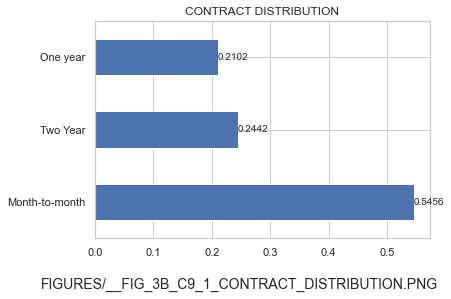

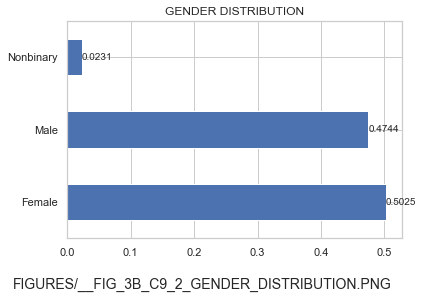

In [25]:
# create distribution plots for a selected list of categorical or boolean features
cat_or_bool_features = ['Contract', 'Gender']
for idx,f in enumerate(cat_or_bool_features):
    create_distribution_plot_from_feature_fig(
        data=df_clean, cat_or_bool_feature=f,
        sect='3B_C9', caption=str(idx+1))

<h3>C11. Explore Categorical Data.

Prior to converting the categorical data for use in the model, as part of exploratory data analysis, I will visualize the original categorical data using a countplot. In a moment, the categorical data will be converted to dummy data and I will lose the original data.

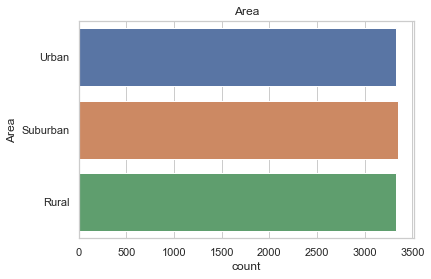

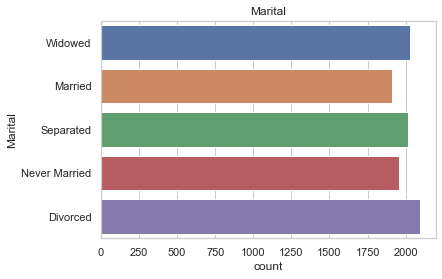

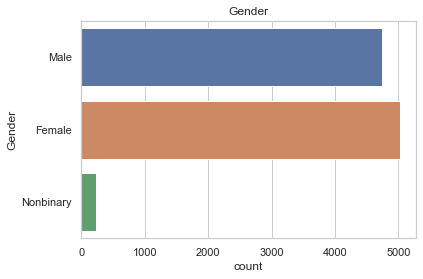

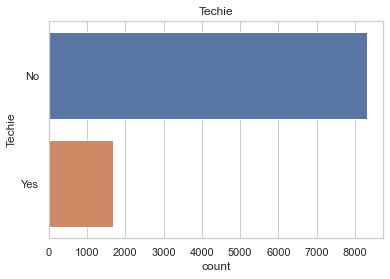

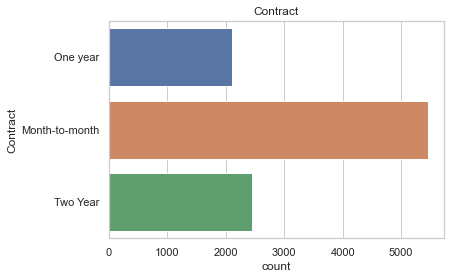

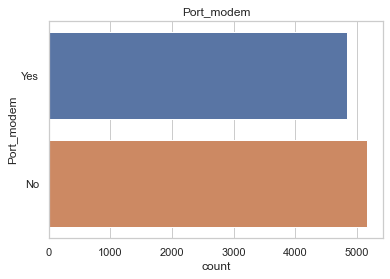

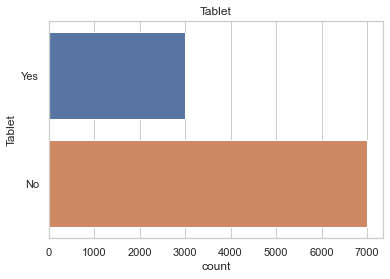

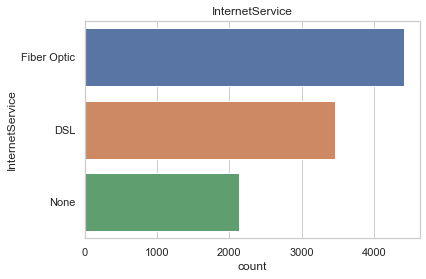

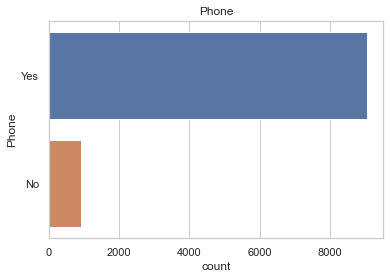

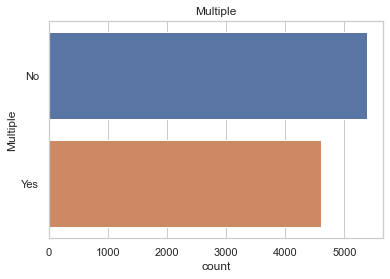

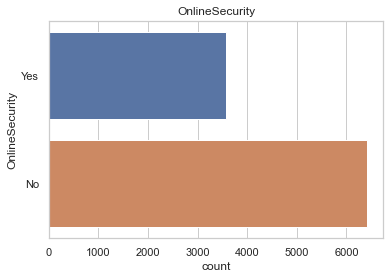

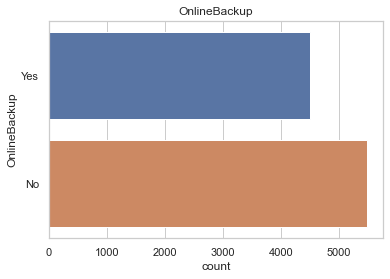

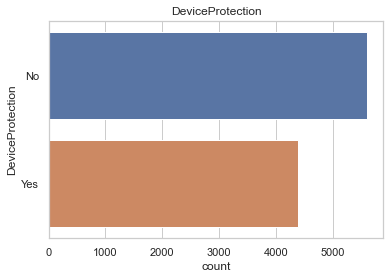

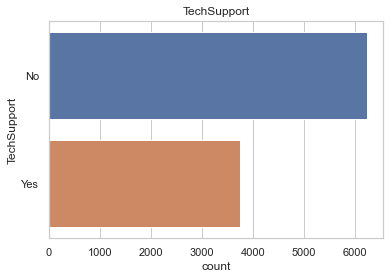

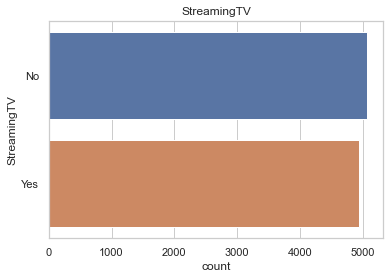

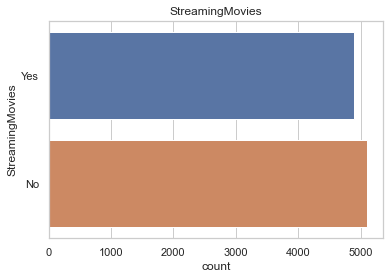

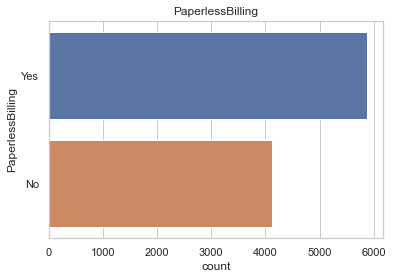

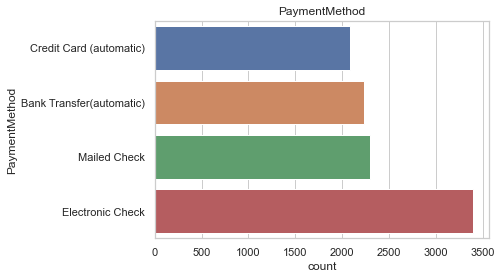

In [26]:
# plot categorical data - before it gets converted
for i, c in enumerate(categorical_features):
    ax = sns.countplot(y=c, data=df_clean)
    plt.title(c)
    plt.savefig('figures/' + str(c) + '.png')
    plt.show()

<h3>C10. Transform Categorical Data.

The regression model requires all of the independent variables to be numeric. Because there are many categorical data, each will have to be converted into numeric data. The data is converted into dummy numeric data using the pandas .get_dummies() method. After the conversion, the original data is removed.

The method uses the option 'drop_first=True'. Most of the categorical data has two or more unique values. When using this option, the .get_dummies() method will remove the first unique value, which is good, because of the multi-collinear nature of this operation. It can be a problem, however, if the data that is removed is data that is necessary. For the purpose of this analysis, I am using the 'drop_first' option, but future analysis may decide to use the other data. I am creating a variable called 'contract' with a snapshot of the contract data before the conversion in order to present an example of this potential problem.

In [27]:
# convert categorical data
for c in categorical_features:
    if c in df_clean.columns:
        df_clean = pd.get_dummies(df_clean, columns=categorical_features, drop_first=True)
        print(df_clean.select_dtypes(include="uint8").columns)

Index(['Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Outage_sec_perweek                     10000 non-null  float64
 5   Email                                  10000 non-null  int64  
 6   Contacts                               10000 non-null  int64  
 7   Yearly_equip_failure                   10000 non-null  int64  
 8   Tenure                                 10000 non-null  float64
 9   MonthlyCharge                          10000 non-null  float64
 10  Bandwidth_GB_Year                      10000 non-null  float64
 11  Are

<h3>C7. Explore Numerical Data.

In [29]:
# variable for numeric data
numerical_features = df_clean.select_dtypes(include="number").columns
print(numerical_features)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


<AxesSubplot:xlabel='MonthlyCharge', ylabel='Density'>

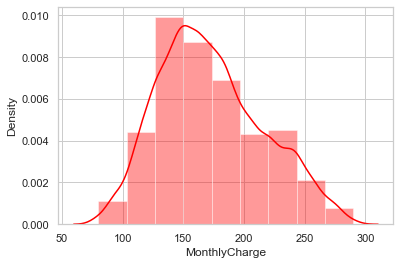

In [30]:
sns.distplot(df_clean['MonthlyCharge'], kde=True, color='red', bins=9)

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

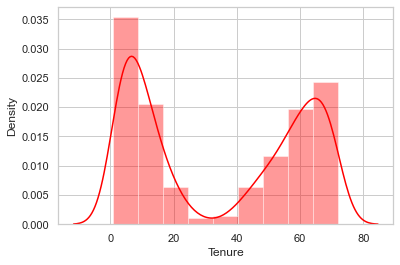

In [31]:
sns.distplot(df_clean['Tenure'], kde=True, color='red', bins=9)

<h3>C8. Explore Numerical Data.

Figure saved to: FIGURES/__FIG_3B_C8_1_POPULATION_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_2_CHILDREN_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_3_AGE_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_4_INCOME_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_5_OUTAGE_SEC_PERWEEK_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_6_EMAIL_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_7_CONTACTS_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_8_YEARLY_EQUIP_FAILURE_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_9_TENURE_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_10_MONTHLYCHARGE_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_11_BANDWIDTH_GB_YEAR_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_12_AREA_SUBURBAN_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_13_AREA_URBAN_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_14_MARITAL_MARRIED_HISTOGRAM.PNG
Figure saved to: FIGURES/__FIG_3B_C8_15_MARITAL_NEVER_MARRIED_HISTOGRAM.PNG
Figure save

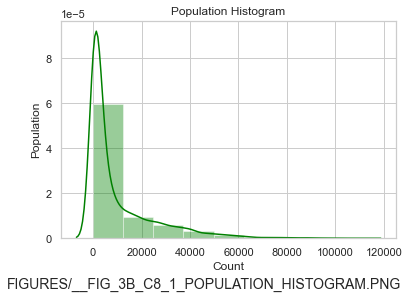

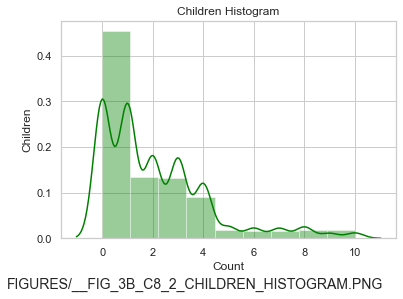

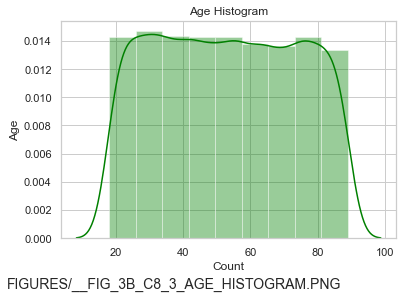

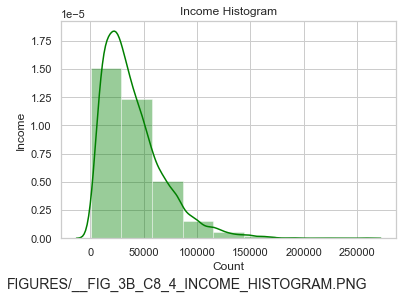

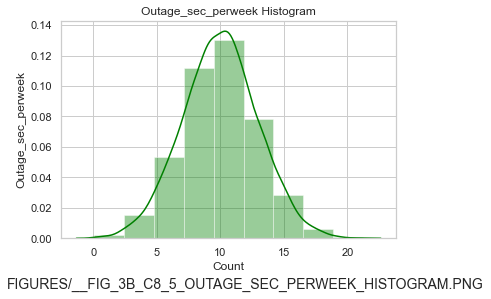

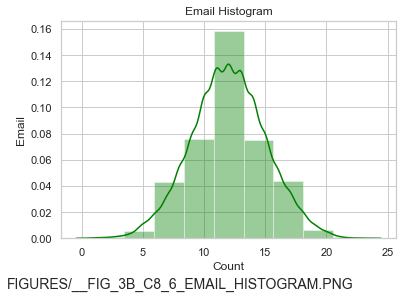

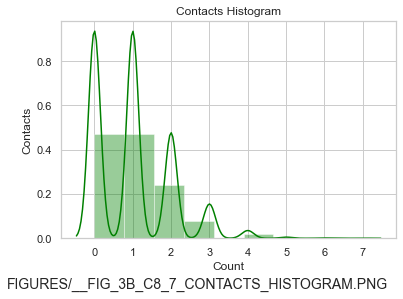

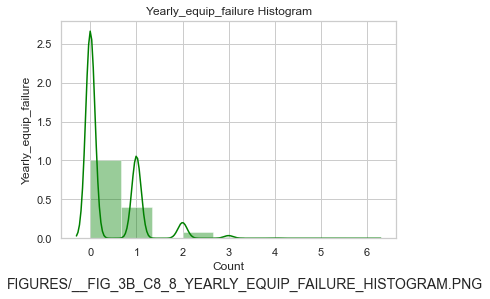

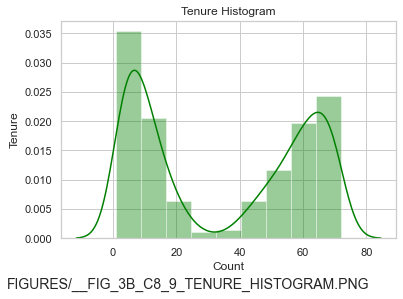

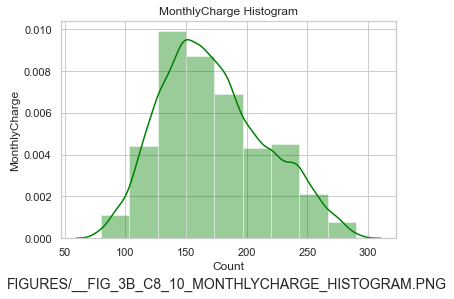

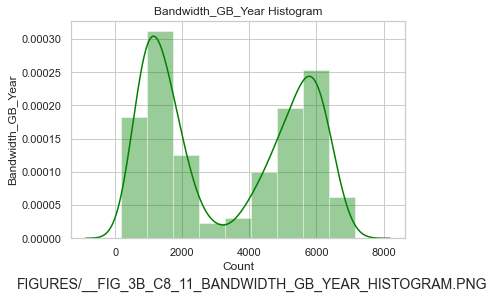

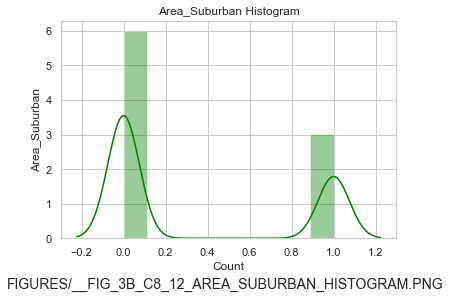

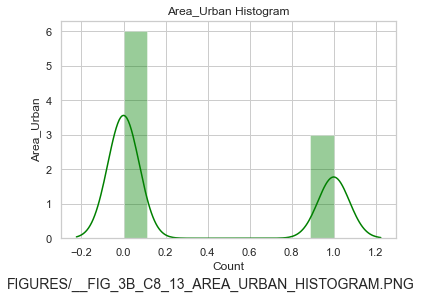

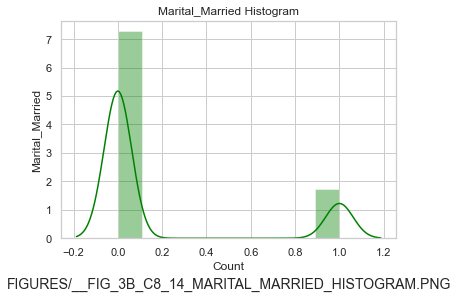

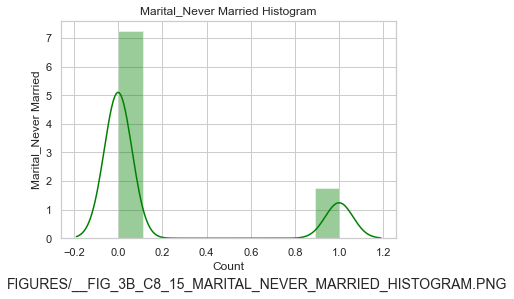

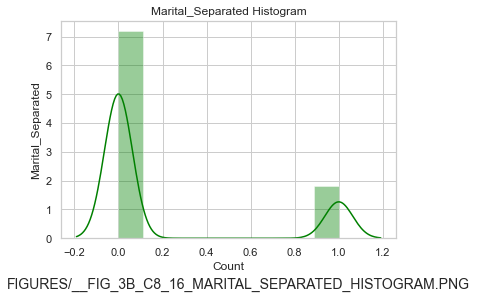

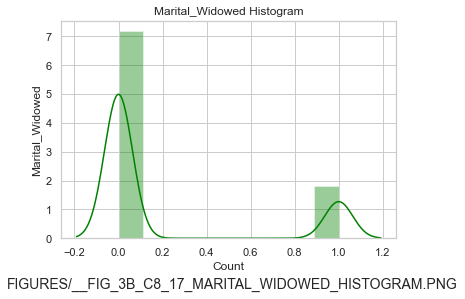

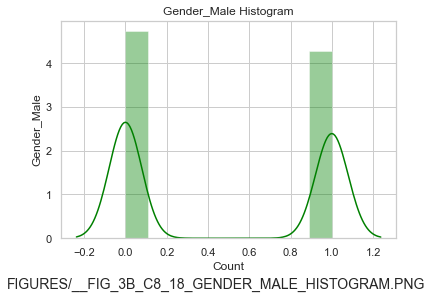

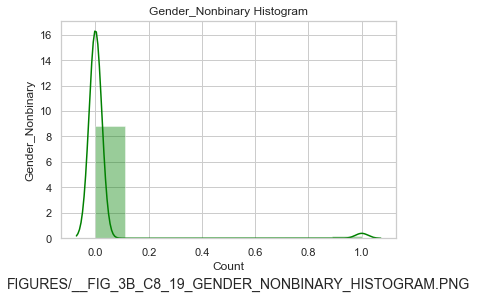

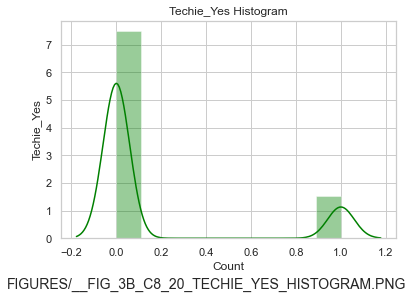

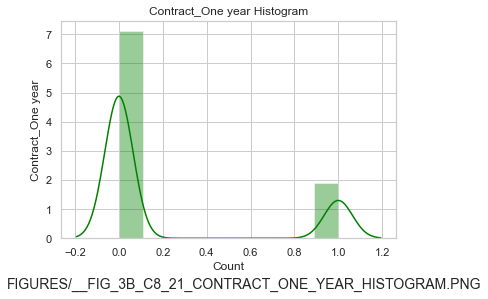

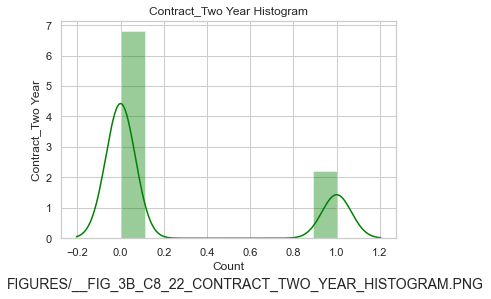

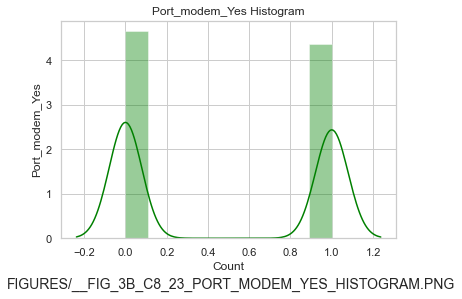

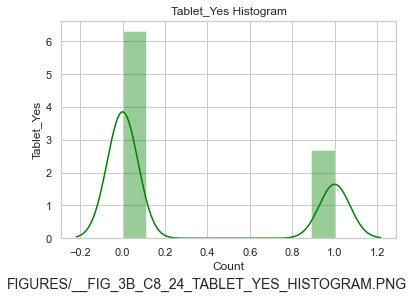

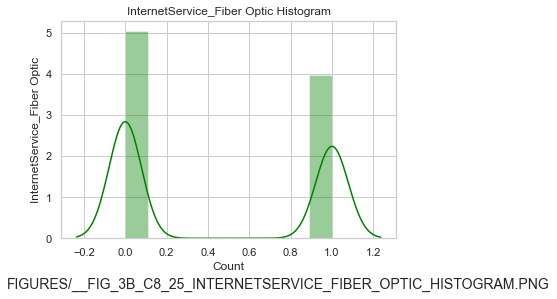

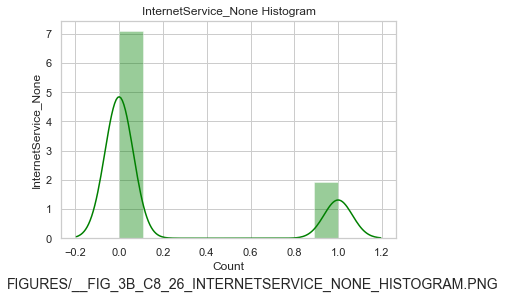

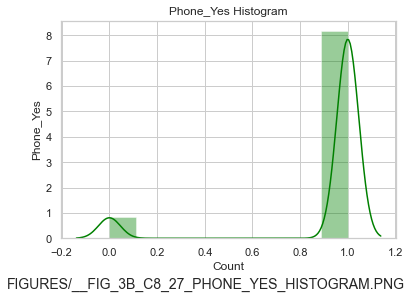

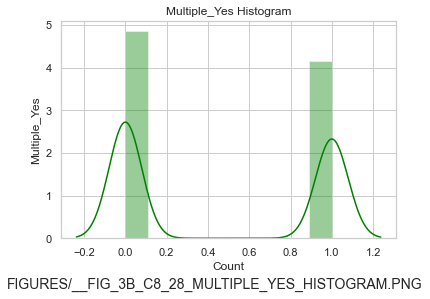

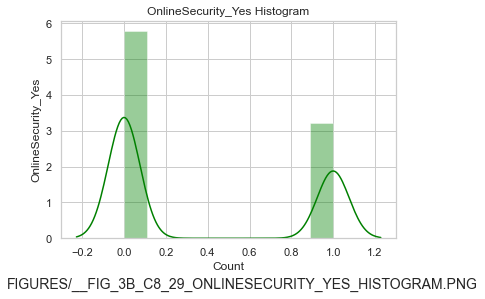

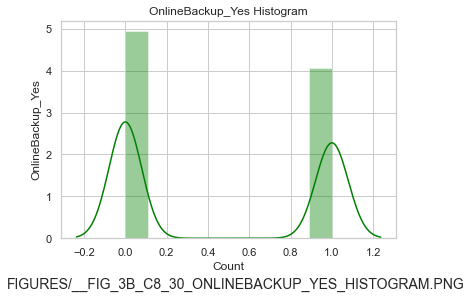

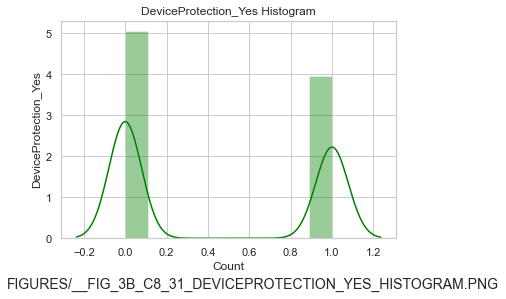

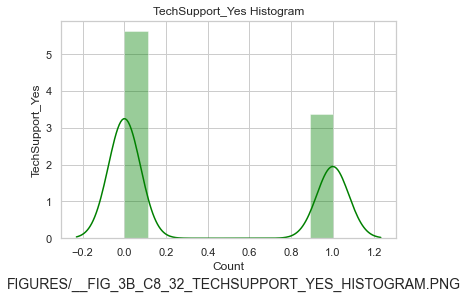

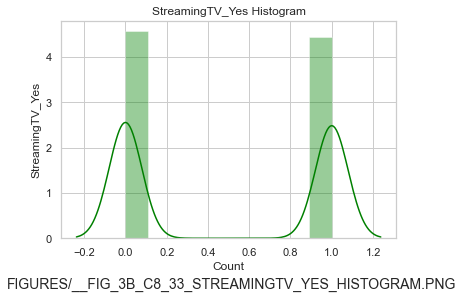

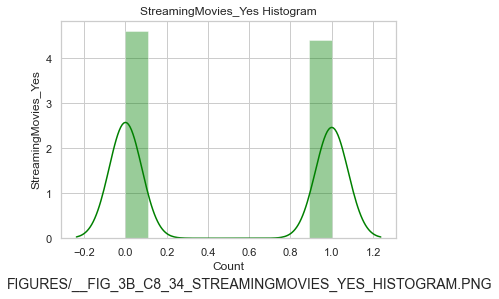

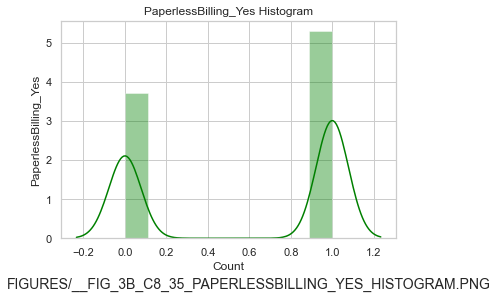

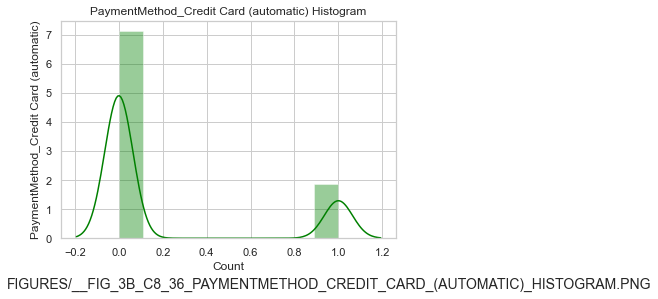

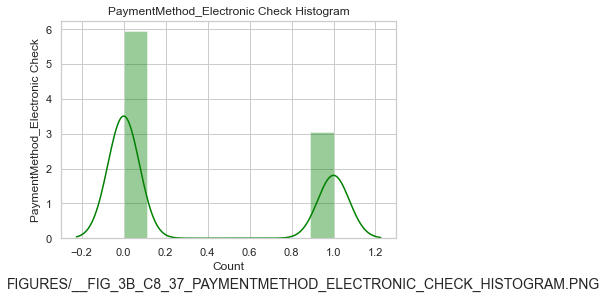

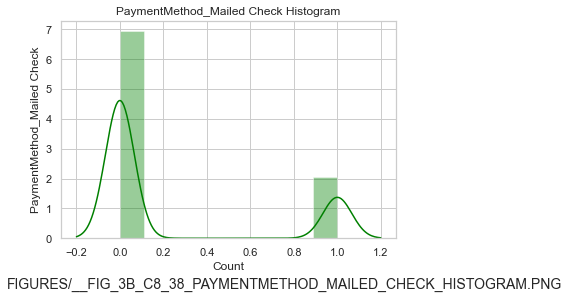

In [32]:
# simple histogram for numerical features
for idx,f in enumerate(numerical_features):
    #df_clean[[f]].hist()
    create_simple_histogram_numerical_feature_fig(
        data=df_clean, numerical_feature=f, bins=9,
        sect='3B_C8', caption=str(idx+1)) 

<h3>C12. Explore Numerical Data.

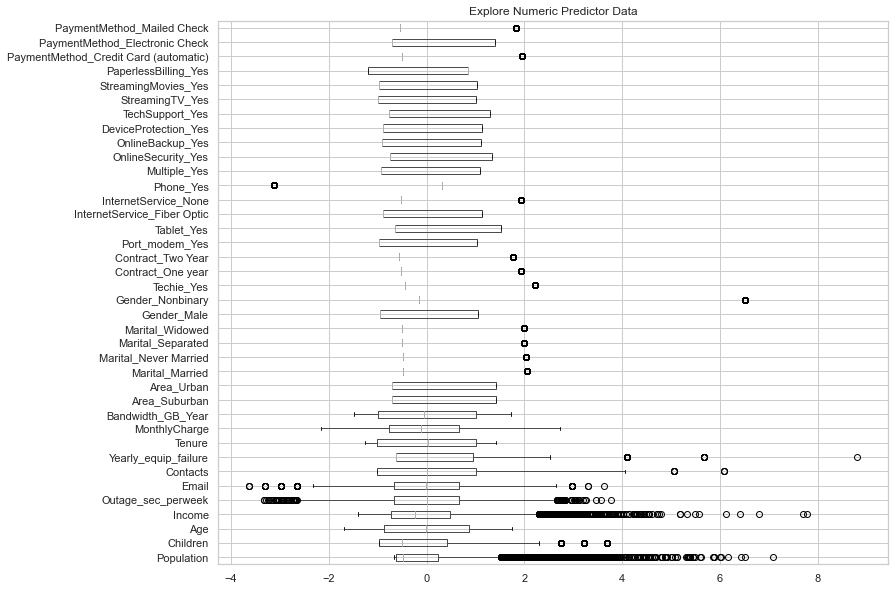

In [33]:
# explore numeric features
plt.figure(figsize=(12, 10))
std_numeric_data = (df_clean[numerical_features] -df_clean[numerical_features].mean()) / df_clean[numerical_features].std()
ax = std_numeric_data.boxplot(vert=False)
plt.title('Explore Numeric Predictor Data')
plt.savefig('figures/' + 'FIG_C12_1_' + 'BOXPLOT.png', facecolor='w')
plt.show()
#print(std_numeric_data.describe(percentiles=None).round(3).T)
#print(df[num_cols].describe(percentiles=None).round(3).T)

<h3>C13. Explore Numerical Data.

<Figure size 720x1440 with 0 Axes>

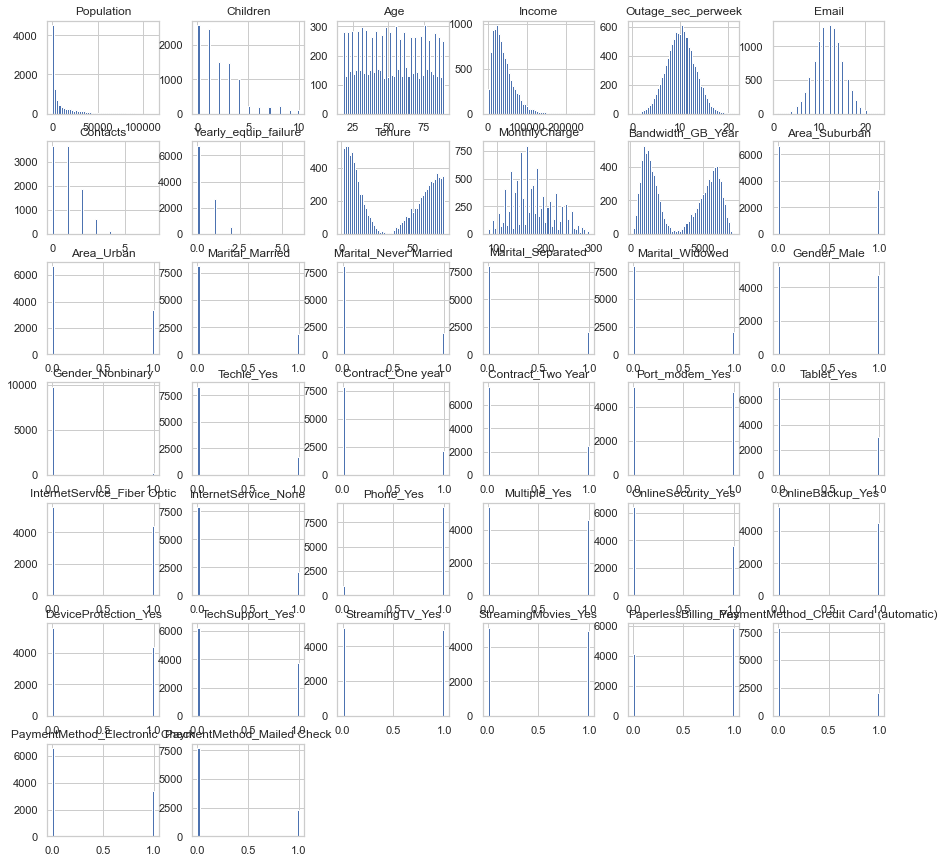

In [34]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = df_clean[numerical_features].hist(bins = 50, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.savefig('figures/' + 'FIG_C13_1_' + 'HISTOGRAM.png', facecolor='w')
plt.show()

<h3>C14. Bivariate Scatter Plot of Numerical Features.

Here are the scatter plots of selected numeric data vs. the target variable of 'MonthlyCharge'. One of the assumptions is that independent and dependent variables are linear, so I am looking for linear relationships here.

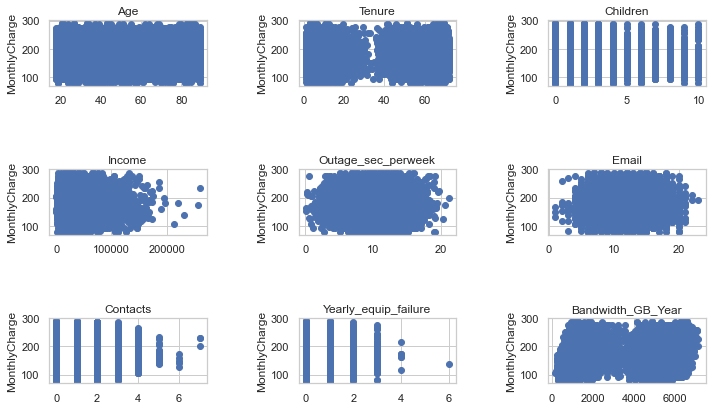

In [35]:
# scatter plot of selected features
fig = plt.figure(figsize=(10, 20))
features = ['Age','Tenure','Children','Income',
            'Outage_sec_perweek','Email','Contacts',
            'Yearly_equip_failure','Bandwidth_GB_Year']
target = df_clean['MonthlyCharge']

for i, c in enumerate(features):
    plt.subplot(10, 3, i+1)
    x = df_clean[c]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(c)
    plt.ylabel('MonthlyCharge')
    fig.tight_layout(h_pad=5, w_pad=5)
    
plt.savefig('figures/' + 'FIG_C14_1_' + 'BIVARIATE_SCATTER.png', facecolor='w')

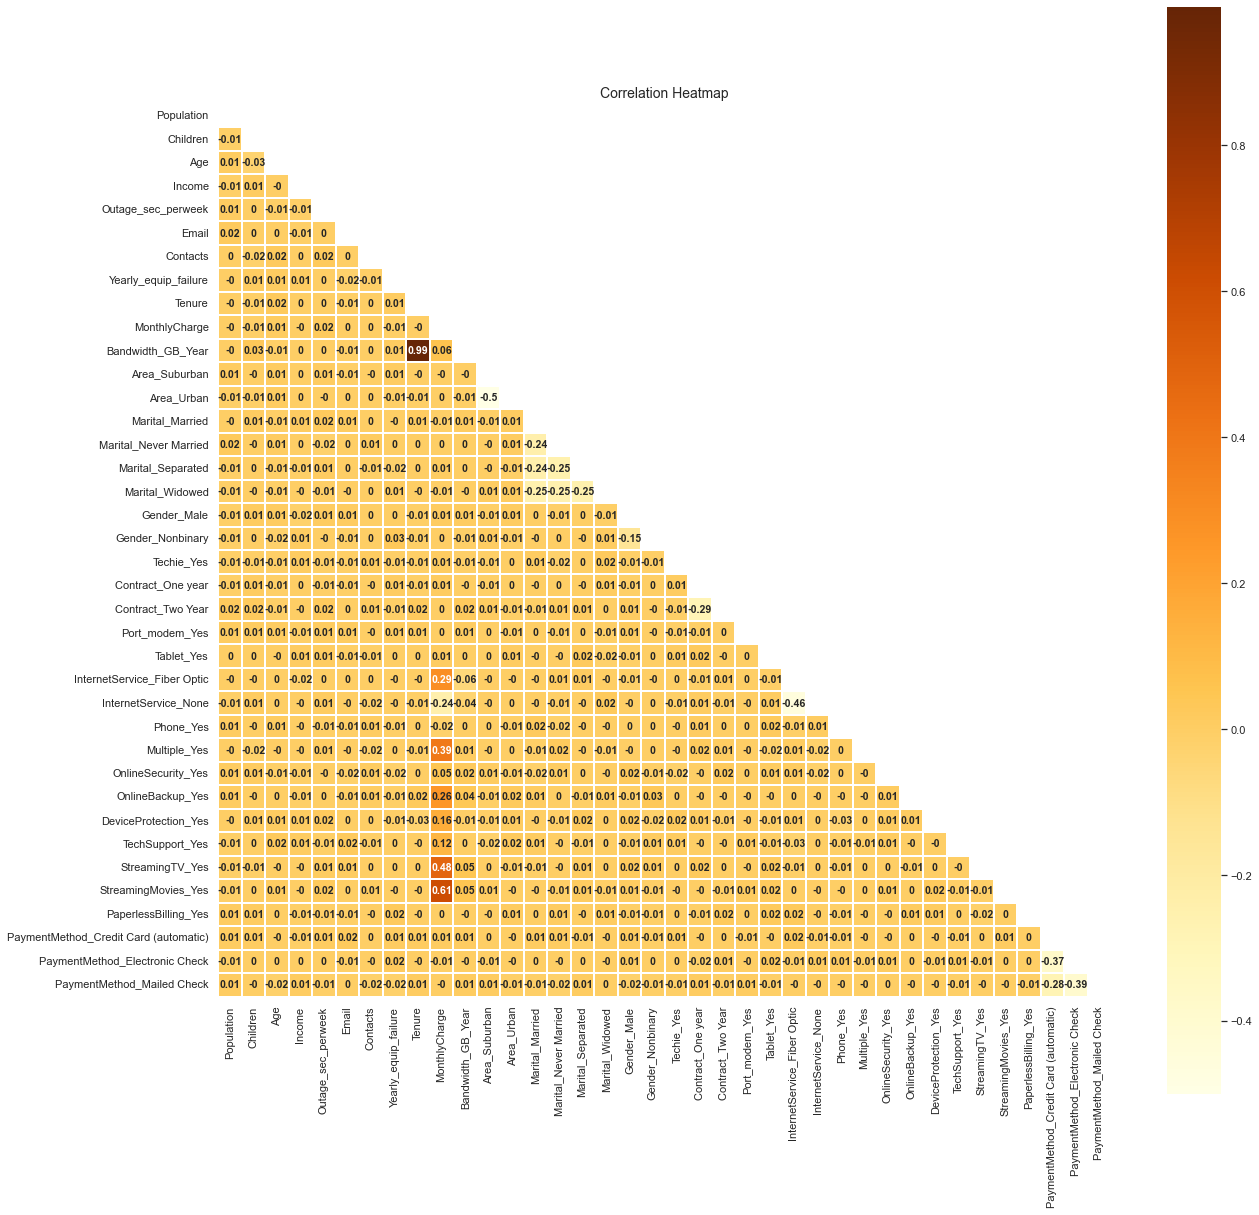

In [36]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(20,20))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
var_corr = round(df_clean.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

<h2>Part IV: Analysis</h2>
D. Perform data analysis and report on results by doing the following:

<h3>D1. Initial Model.

In [37]:
# convert array to list then append lists then remove target
model_features = numerical_features.tolist()
#model_features.remove('Churn')

In [38]:
target = 'MonthlyCharge'
model_features.remove(target)

In [39]:
y = df_clean[target]
X = df_clean[model_features]

In [40]:
# initial model
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
print(model.summary2()) # using alternate summary layout

                             Results: Ordinary least squares
Model:                       OLS                     Adj. R-squared:            0.995     
Dependent Variable:          MonthlyCharge           AIC:                       49597.8789
Date:                        2022-05-28 18:02        BIC:                       49871.8719
No. Observations:            10000                   Log-Likelihood:            -24761.   
Df Model:                    37                      F-statistic:               5.966e+04 
Df Residuals:                9962                    Prob (F-statistic):        0.00      
R-squared:                   0.996                   Scale:                     8.3155    
------------------------------------------------------------------------------------------
                                       Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------------------------
const                        

<h3>D2. Feature Reduction.

In [41]:
# find predictor pairs with high coorelation
#custom_corr_matrix(X,'Model_2')
get_top_n_correlations(X, 20)

Tenure                                 Bandwidth_GB_Year                 0.991495
Area_Suburban                          Area_Urban                        0.500711
InternetService_Fiber Optic            InternetService_None              0.461753
PaymentMethod_Electronic Check         PaymentMethod_Mailed Check        0.390989
PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check    0.367992
Contract_One year                      Contract_Two Year                 0.293243
PaymentMethod_Credit Card (automatic)  PaymentMethod_Mailed Check        0.279547
Marital_Separated                      Marital_Widowed                   0.253210
Marital_Never Married                  Marital_Widowed                   0.248636
                                       Marital_Separated                 0.247636
Marital_Married                        Marital_Widowed                   0.245075
                                       Marital_Separated                 0.244089
                

In [42]:
# drop all columns from model where p-value > 0.05 (see Geeks for Geeks (2021))
equation = model.summary2().tables[1]
temp_drop = []
for i in equation.itertuples():
    if i[4] > 0.05:
        temp_drop.append(i[0])
        print('Drop {} with p-value of {:.3f}.'.format(i[0],i[4]))
X = pd.DataFrame(X) # reset dataframe
X.drop(temp_drop, axis = 1, inplace=True) # drop

Drop Population with p-value of 0.354.
Drop Income with p-value of 0.480.
Drop Outage_sec_perweek with p-value of 0.554.
Drop Email with p-value of 0.859.
Drop Contacts with p-value of 0.497.
Drop Yearly_equip_failure with p-value of 0.863.
Drop Area_Urban with p-value of 0.235.
Drop Marital_Married with p-value of 0.885.
Drop Marital_Never Married with p-value of 0.564.
Drop Marital_Separated with p-value of 0.456.
Drop Marital_Widowed with p-value of 0.871.
Drop Techie_Yes with p-value of 0.508.
Drop Contract_One year with p-value of 0.576.
Drop Contract_Two Year with p-value of 0.364.
Drop Port_modem_Yes with p-value of 0.437.
Drop Tablet_Yes with p-value of 0.989.
Drop Phone_Yes with p-value of 0.854.
Drop PaperlessBilling_Yes with p-value of 0.212.
Drop PaymentMethod_Credit Card (automatic) with p-value of 0.761.
Drop PaymentMethod_Electronic Check with p-value of 0.383.


In [43]:
# drop other columns with high multi-collinearity (see Geeks for Geeks (2021))
temp_drop =['Bandwidth_GB_Year', 'Tenure','Children','InternetService_None','Age']
X = pd.DataFrame(X) # reset dataframe
X.drop(temp_drop, axis = 1, inplace=True) # drop

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Area_Suburban                10000 non-null  uint8
 1   Gender_Male                  10000 non-null  uint8
 2   Gender_Nonbinary             10000 non-null  uint8
 3   InternetService_Fiber Optic  10000 non-null  uint8
 4   Multiple_Yes                 10000 non-null  uint8
 5   OnlineSecurity_Yes           10000 non-null  uint8
 6   OnlineBackup_Yes             10000 non-null  uint8
 7   DeviceProtection_Yes         10000 non-null  uint8
 8   TechSupport_Yes              10000 non-null  uint8
 9   StreamingTV_Yes              10000 non-null  uint8
 10  StreamingMovies_Yes          10000 non-null  uint8
 11  PaymentMethod_Mailed Check   10000 non-null  uint8
dtypes: uint8(12)
memory usage: 117.3 KB


<h3>D3. Updated Model.

In [45]:
# updated model
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
print(model.summary2()) # using alternate summary layout

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.946     
Dependent Variable:    MonthlyCharge       AIC:                   74366.7372
Date:                  2022-05-28 18:02    BIC:                   74460.4716
No. Observations:      10000               Log-Likelihood:        -37170.   
Df Model:              12                  F-statistic:           1.465e+04 
Df Residuals:          9987                Prob (F-statistic):    0.00      
R-squared:             0.946               Scale:                 99.236    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
const                       78.8953   0.3004 262.6253 0.0000 78.3065 79.4842
Area_Suburban                0.0860   0.2112   0.4072 0.6839 -0.3280  0.5000
Gender_Male           

<h3>D4. Updated Model.

In [46]:
# find predictor pairs with high coorelation
get_top_n_correlations(X, 10)

Gender_Male                  Gender_Nonbinary              0.146092
Gender_Nonbinary             OnlineBackup_Yes              0.029316
InternetService_Fiber Optic  TechSupport_Yes               0.026211
Gender_Male                  PaymentMethod_Mailed Check    0.022103
DeviceProtection_Yes         StreamingMovies_Yes           0.019450
Gender_Male                  DeviceProtection_Yes          0.018678
Gender_Nonbinary             DeviceProtection_Yes          0.016523
Gender_Male                  OnlineSecurity_Yes            0.016105
Area_Suburban                TechSupport_Yes               0.015650
Gender_Male                  StreamingTV_Yes               0.015094
dtype: float64

In [47]:
# drop all columns from model where p-value > 0.05 (see Geeks for Geeks (2021))
equation = model.summary2().tables[1]
temp_drop = []
for i in equation.itertuples():
    if i[4] > 0.05:
        temp_drop.append(i[0])
        print('Drop {} with p-value of {:.3f}.'.format(i[0],i[4]))
X = pd.DataFrame(X) # reset dataframe
X.drop(temp_drop, axis = 1, inplace=True) # drop

Drop Area_Suburban with p-value of 0.684.
Drop Gender_Male with p-value of 0.334.
Drop Gender_Nonbinary with p-value of 0.173.
Drop PaymentMethod_Mailed Check with p-value of 0.626.


<h3>D5. Final Model.

In [48]:
Xc = sm.add_constant(X) # reset 
model = sm.OLS(y, Xc).fit()
print(model.summary2()) # using alternate summary layout

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.946     
Dependent Variable:    MonthlyCharge       AIC:                   74361.6344
Date:                  2022-05-28 18:02    BIC:                   74426.5275
No. Observations:      10000               Log-Likelihood:        -37172.   
Df Model:              8                   F-statistic:           2.198e+04 
Df Residuals:          9991                Prob (F-statistic):    0.00      
R-squared:             0.946               Scale:                 99.225    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
const                       78.8429   0.2689 293.2430 0.0000 78.3159 79.3700
InternetService_Fiber Optic 24.7418   0.2007 123.2522 0.0000 24.3483 25.1353
Multiple_Yes          

<h2>Part V: Compare and Results</h2>
E. Compare models and explain results.

<h3>E1. Final Model.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


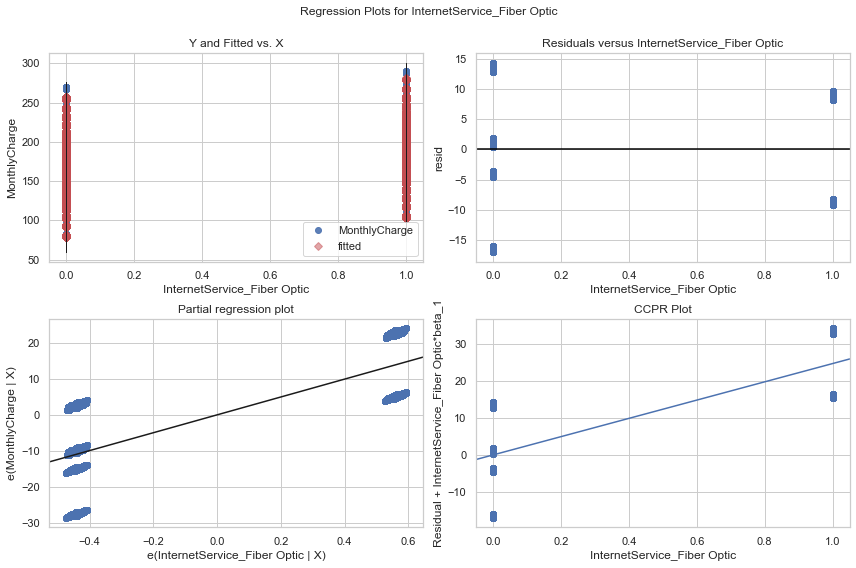

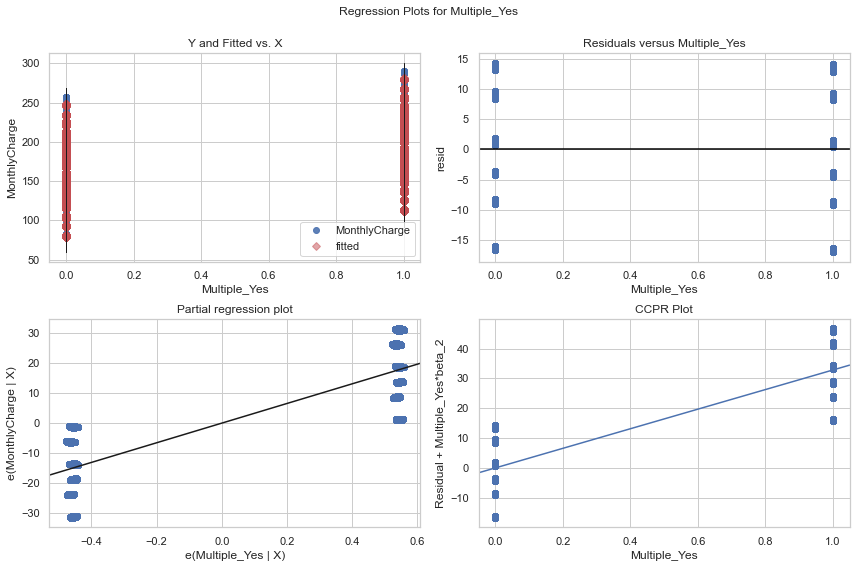

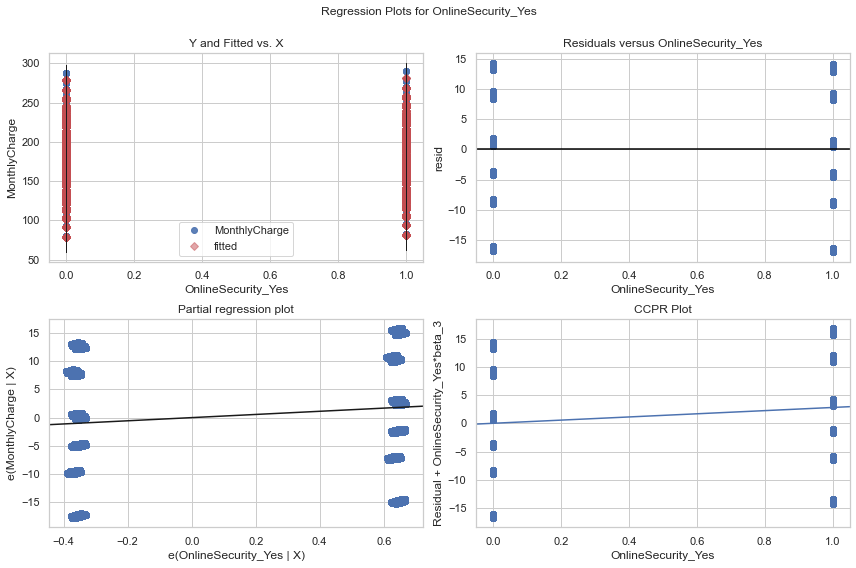

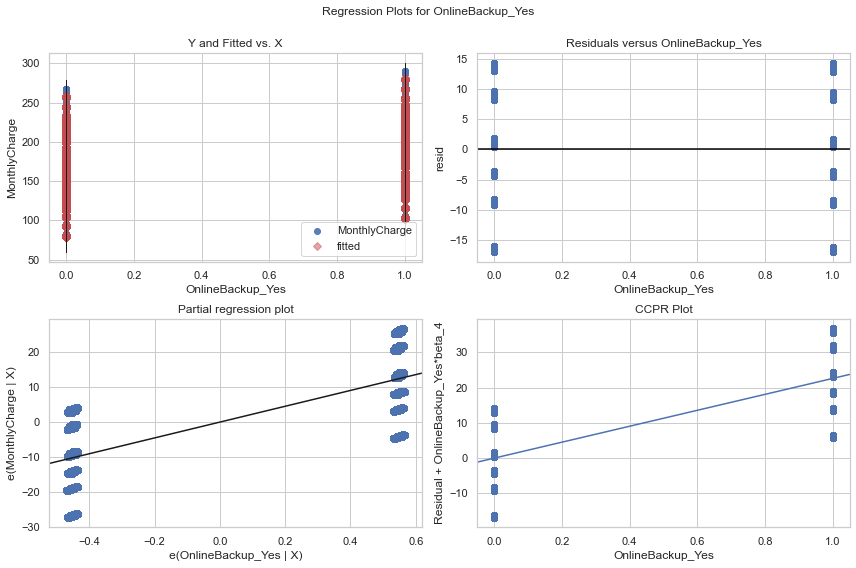

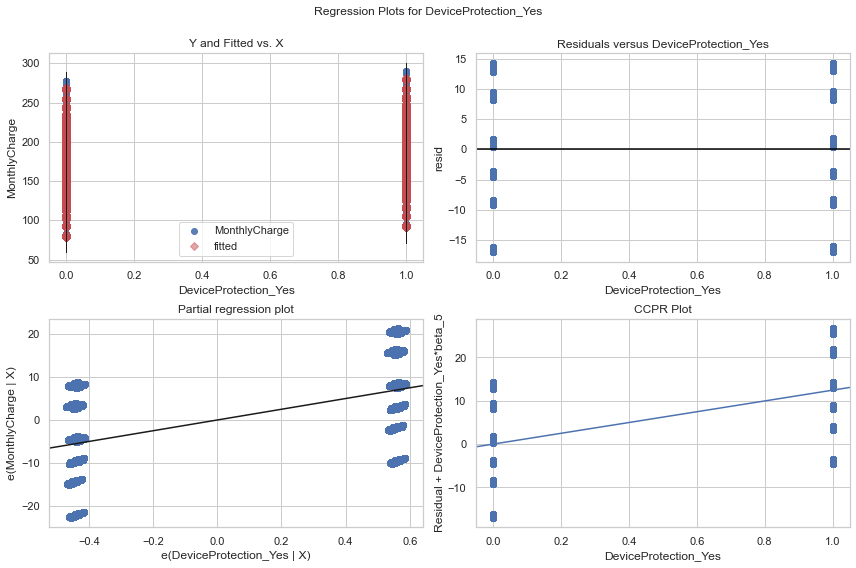

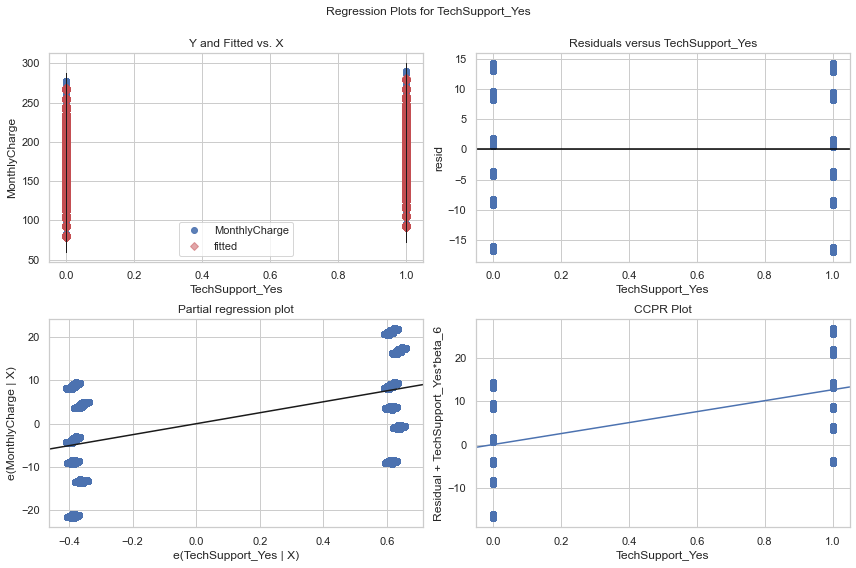

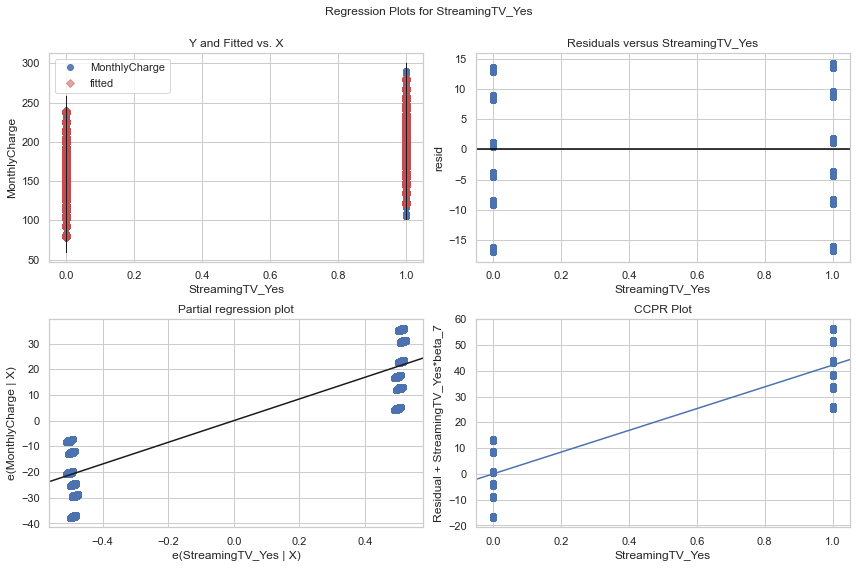

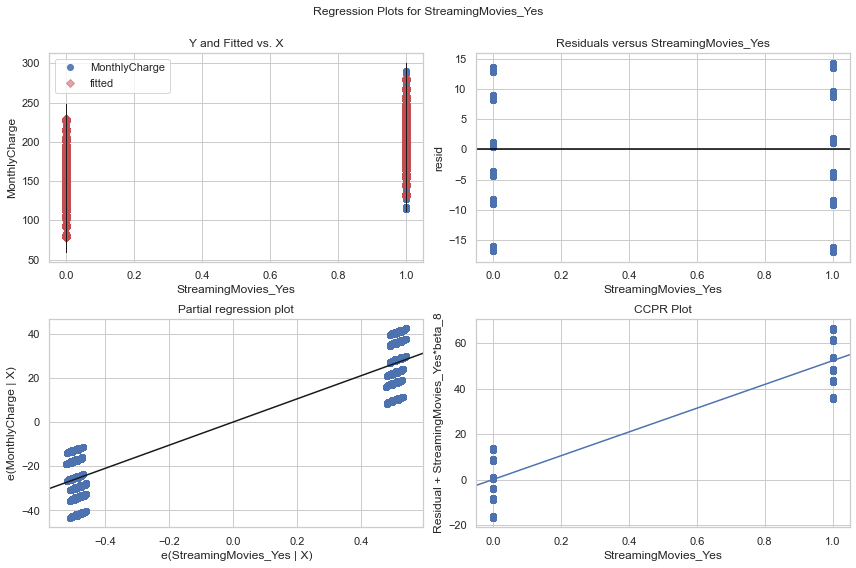

In [49]:
#create residual plots for all of the model's final predictor variables
for c in X.columns:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, c, fig=fig)

<h2>Part VI: Final Results</h2>
F. Final results.

<h3>F1. Final Results.

In [50]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model.summary2().tables[0][3][0]))
equation = model.summary2().tables[1]
print('Estimate [{}] as y = '.format(model.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.3f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.946
Estimate [MonthlyCharge] as y = 
   +78.843 x ( const ) 
   +24.742 x ( InternetService_Fiber Optic ) 
   +32.799 x ( Multiple_Yes ) 
   +2.801 x ( OnlineSecurity_Yes ) 
   +22.575 x ( OnlineBackup_Yes ) 
   +12.456 x ( DeviceProtection_Yes ) 
   +12.642 x ( TechSupport_Yes ) 
   +42.179 x ( StreamingTV_Yes ) 
   +52.339 x ( StreamingMovies_Yes ) 


The final model uses eight (8) predictor variables and has an R-squared value of 94.6% and a condition number of 5 which indicate that this is a pretty good model.

Because the final regression model is based on categorical data, yes and no values, then each of the cooefficients has the behaviour of adding a given value if yes, or adding zero (0) if no. For example, if the customer only has fiber optic service and nothing else, then you could acurately predict the monthly charge by adding the constant value of 78.84 to the cooefficient value of 24.74 which equals $103.58 in this case.</div>

We can see that in each of the residual plots, the values are randomly distributed above and below the zero line. This is an indication of multivariate normality, which is to say that the residuals are normally distributed.